In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller

# Read data from file
Serie_Reclamos = pd.read_excel("/home/pc/Documentos/PaginaWilliam/AnalisisFinanciero/data/Serie_Reclamos.xlsx")


In [49]:

# Reverse data to get the correct time series order
Y = Serie_Reclamos["N"][::-1]
Fe = Serie_Reclamos["FECHA"][::-1]



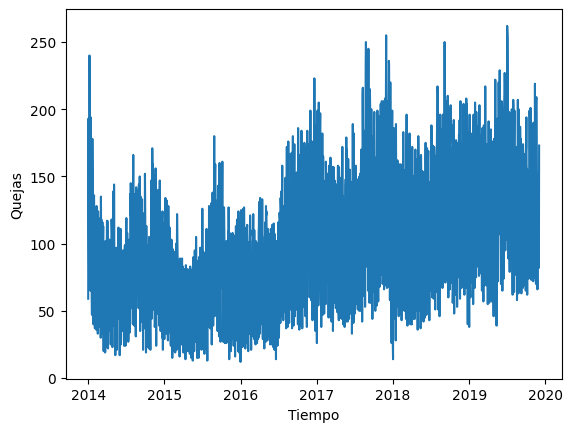

In [50]:
# Plot time series
plt.plot(Fe, Y)
plt.xlabel("Tiempo")
plt.ylabel("Quejas")
plt.show()



KeyError: 'Column not found: N'

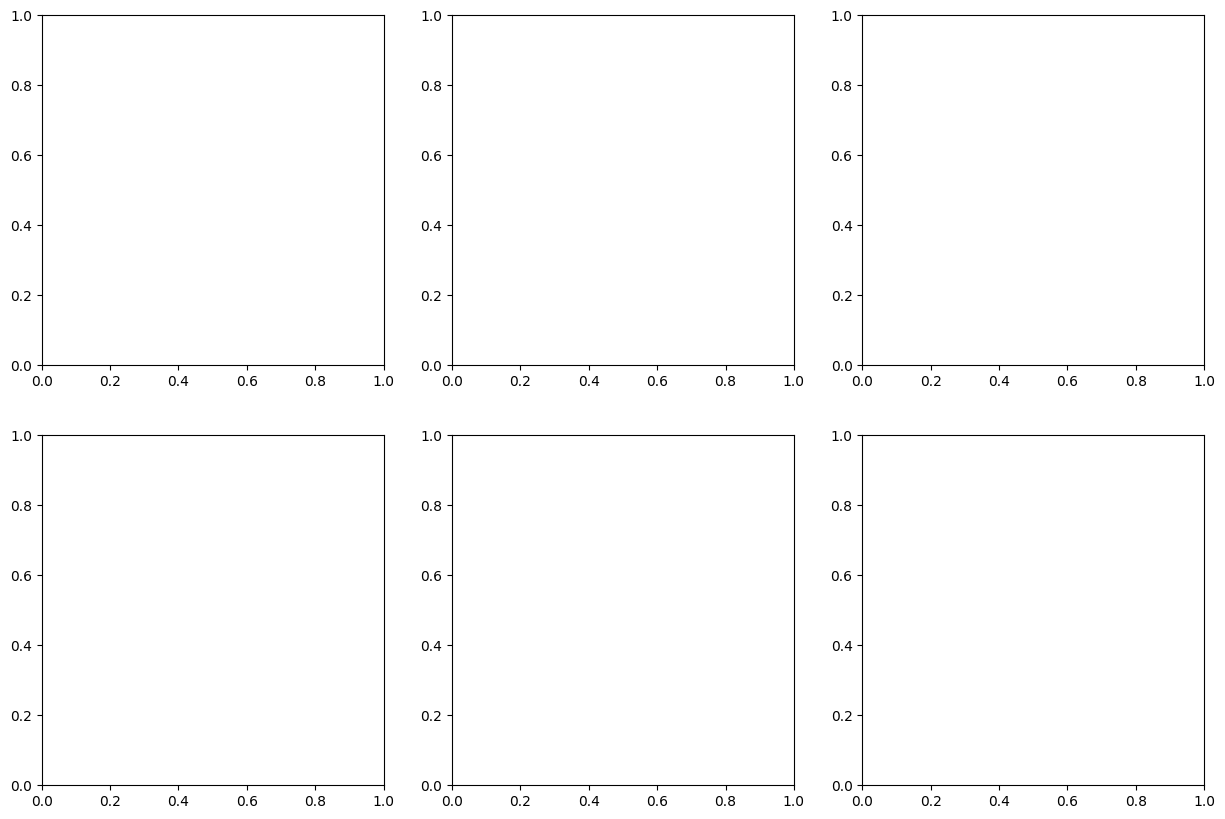

In [51]:
# Create time series object
X = pd.Series(Y.values, index=pd.date_range(start="2014-01-01", end="2019-11-27", freq="D"))

# Box plot by day of week for each year
years = X.groupby(X.index.year)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, (name, group) in enumerate(years):
    ax = axs[i]
    ax.boxplot(group.groupby(group.index.weekday)["N"].apply(list).values)
    ax.set_xticklabels(["MIE", "JUE", "VIE", "SAB", "DOM", "LUN", "MAR"])
    ax.set_title(name)
plt.show()

## Frecuencias

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import periodogram

# load data
df = pd.read_excel("/home/pc/Documentos/PaginaWilliam/AnalisisFinanciero/data/Serie_Reclamos.xlsx")

# reverse order of Y
Y = df["N"].values[::-1]

# create time series
dates = pd.date_range(start="2014-01-01", end="2019-11-27", freq="D")
dates
len(Y) ==len(dates)
# df.groupby('FECHA').sum()
X = pd.Series(Y, index=dates)

X


ImportError: cannot import name 'periodogram' from 'statsmodels.tsa.stattools' (/home/pc/Documentos/PaginaWilliam/AnalisisFinanciero/env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py)

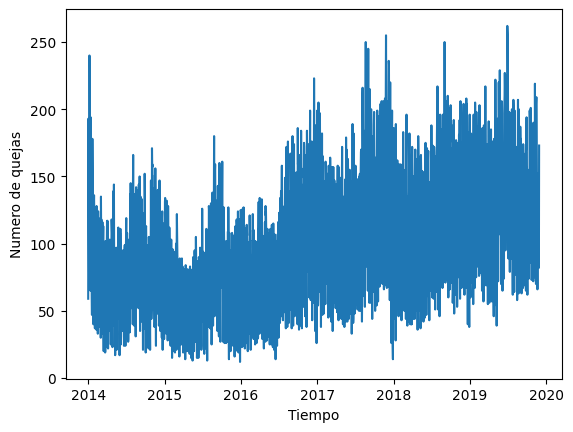

In [54]:

# visualize the time series
plt.plot(X)
plt.xlabel("Tiempo")
plt.ylabel("Numero de quejas")
plt.show()



count    2157.000000
mean      109.683820
std        50.970964
min        12.000000
25%        69.000000
50%       107.000000
75%       149.000000
max       262.000000
dtype: float64


/home/pc/Documentos/PaginaWilliam/AnalisisFinanciero/env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


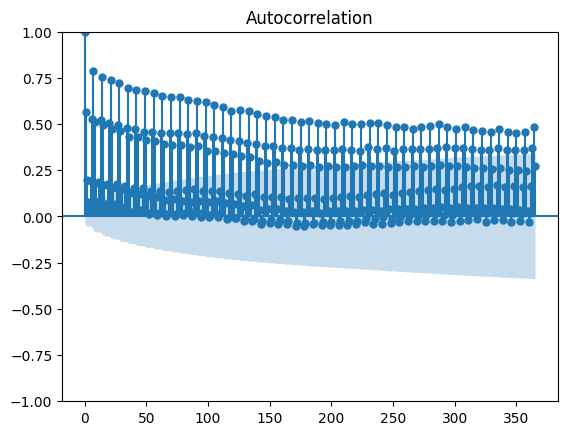

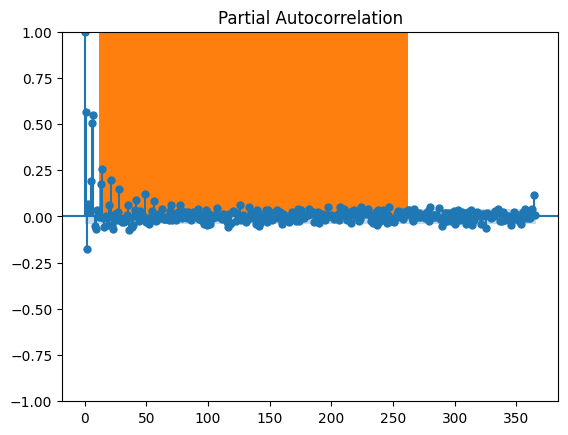

In [56]:
# calculate summary statistics and visualize distribution
print(X.describe())
sm.graphics.tsa.plot_acf(X, lags=365)
sm.graphics.tsa.plot_pacf(X, lags=365)
plt.hist(X, bins=30)
plt.show()



In [64]:

from statsmodels.tsa.stattools import periodogram

# calculate periodogram
freq, spec = periodogram(X)
plt.plot(freq, spec)
plt.xlabel("frequency")
plt.ylabel("periodogram")
plt.show()

ImportError: cannot import name 'periodogram' from 'statsmodels.tsa.stattools' (/home/pc/Documentos/PaginaWilliam/AnalisisFinanciero/env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py)